# Análise experimental de complexidade da convolução espacial e por FFT

Processamento Digital de Imagens

Nomes: Igor Teixeira Machado RA: 769708
Rafael Vinícius Passador RA: 790036

* pip install numpy
* python -m pip install -U matplotlib
* pip install scipy

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift
import timeit
import random
import os

In [16]:
def random_matrix(n,m):
    matrix = np.zeros((n,m))

    for i in range(n):
        for j in range(m):
            matrix[i][j] = random.randint(0, 255)

    return matrix

def filtroTransform(filtro, img):

    filtro = filtro/filtro.sum()

    num_rows, num_cols = img.shape
    img_padded = np.pad(img, ((0, num_rows), (0, num_cols)), mode='constant', constant_values = 0)
    filt_image = np.zeros([2 * num_rows, 2 * num_cols])
    filt_image[num_rows - 3:num_rows + 4, num_cols - 3:num_cols + 4] = filtro

    filt_image = fftshift(filt_image)
    Ffilt = fft2(filt_image)
    freq_r = fftfreq(2 * num_rows)
    freq_c = fftfreq(2 * num_cols)

    Ffilt = fftshift(Ffilt)
    freq_r = fftshift(freq_r)
    freq_c = fftshift(freq_c)

    return Ffilt, freq_r, freq_c

def testeTempoExecucao(sinal, filtro, numeroExecucoes):

    #filtro, _, _ = filtroTransform(filtro, sinal)
    convolveDirect = np.zeros(sinal.shape, dtype=np.uint16)
    convolveFFT = np.zeros(sinal.shape, dtype=np.uint16)
    convolveDirect_time = timeit.timeit(lambda : (convolveDirect := signal.convolve(sinal, filtro, method='direct')), number = numeroExecucoes)
    convolveFFT_time = timeit.timeit(lambda : (convolveFFT := signal.convolve(sinal, filtro, method='fft')), number = numeroExecucoes)
    print("Tempo do método direto: %f" % convolveDirect_time + " Tamanho do sinal: " + str(sinal.shape) + " Tamanho do filtro: " + str(filtro.shape))
    print("Tempo do método FFT: %f" % convolveFFT_time + " Tamanho do sinal: " + str(sinal.shape) + " Tamanho do filtro: " + str(filtro.shape))
    compararTempoMetodos(convolveDirect_time, convolveFFT_time)

    return convolveDirect, convolveFFT

def compararTempoMetodos(timeDirect, timeFFT):

    print("Diferença entre os tempos: " + str(abs(timeFFT - timeDirect)))

    if timeDirect < timeFFT:
        print("Método direto é mais rápido")
    else:
        print("Método FFT é mais rápido")
    pass

In [17]:
# Filtro fixo e sinal váriavel
filtro = random_matrix(5,5)
for i in range(2, 100):
    sinal = random_matrix(i, i)
    testeTempoExecucao(sinal, filtro, 10)

Tempo do método direto: 0.000672 Tamanho do sinal: (2, 2) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.004407 Tamanho do sinal: (2, 2) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.0037355000094976276
Método direto é mais rápido
Tempo do método direto: 0.000918 Tamanho do sinal: (3, 3) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.002673 Tamanho do sinal: (3, 3) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.0017554999940330163
Método direto é mais rápido
Tempo do método direto: 0.001155 Tamanho do sinal: (4, 4) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.002570 Tamanho do sinal: (4, 4) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.0014150000060908496
Método direto é mais rápido
Tempo do método direto: 0.000725 Tamanho do sinal: (5, 5) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.001695 Tamanho do sinal: (5, 5) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.0009701999952085316
Método direto é mais rápido
Tempo do método direto: 0.001274

In [18]:
# sinal fixo e filtro variável
sinal = random_matrix(50, 50)
for i in range(2, 10):
    filtro = random_matrix(i, i)
    testeTempoExecucao(sinal, filtro, 10)

Tempo do método direto: 0.006273 Tamanho do sinal: (50, 50) Tamanho do filtro: (2, 2)
Tempo do método FFT: 0.005396 Tamanho do sinal: (50, 50) Tamanho do filtro: (2, 2)
Diferença entre os tempos: 0.0008766999962972477
Método FFT é mais rápido
Tempo do método direto: 0.026498 Tamanho do sinal: (50, 50) Tamanho do filtro: (3, 3)
Tempo do método FFT: 0.009710 Tamanho do sinal: (50, 50) Tamanho do filtro: (3, 3)
Diferença entre os tempos: 0.01678719998744782
Método FFT é mais rápido
Tempo do método direto: 0.082813 Tamanho do sinal: (50, 50) Tamanho do filtro: (4, 4)
Tempo do método FFT: 0.007434 Tamanho do sinal: (50, 50) Tamanho do filtro: (4, 4)
Diferença entre os tempos: 0.07537910001701675
Método FFT é mais rápido
Tempo do método direto: 0.033832 Tamanho do sinal: (50, 50) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.008307 Tamanho do sinal: (50, 50) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.025525299977743998
Método FFT é mais rápido
Tempo do método direto: 0.054391 

(378, 400)
Tempo do método direto: 0.328839 Tamanho do sinal: (378, 400) Tamanho do filtro: (2, 2)
Tempo do método FFT: 0.165097 Tamanho do sinal: (378, 400) Tamanho do filtro: (2, 2)
Diferença entre os tempos: 0.16374139999970794
Método FFT é mais rápido
Tempo do método direto: 0.680820 Tamanho do sinal: (378, 400) Tamanho do filtro: (3, 3)
Tempo do método FFT: 0.243501 Tamanho do sinal: (378, 400) Tamanho do filtro: (3, 3)
Diferença entre os tempos: 0.4373182999988785
Método FFT é mais rápido
Tempo do método direto: 0.828178 Tamanho do sinal: (378, 400) Tamanho do filtro: (4, 4)
Tempo do método FFT: 0.173417 Tamanho do sinal: (378, 400) Tamanho do filtro: (4, 4)
Diferença entre os tempos: 0.6547609999979613
Método FFT é mais rápido
Tempo do método direto: 1.726353 Tamanho do sinal: (378, 400) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.189246 Tamanho do sinal: (378, 400) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 1.5371069999819156
Método FFT é mais rápido
Tempo do mét

C:\Users\iteix\AppData\Local\Temp\ipykernel_13496\426368005.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Tempo do método direto: 7.637944 Tamanho do sinal: (378, 400) Tamanho do filtro: (12, 12)
Tempo do método FFT: 0.181365 Tamanho do sinal: (378, 400) Tamanho do filtro: (12, 12)
Diferença entre os tempos: 7.456579100005911
Método FFT é mais rápido
Tempo do método direto: 9.100811 Tamanho do sinal: (378, 400) Tamanho do filtro: (13, 13)
Tempo do método FFT: 0.220700 Tamanho do sinal: (378, 400) Tamanho do filtro: (13, 13)
Diferença entre os tempos: 8.880110700018122
Método FFT é mais rápido
Tempo do método direto: 11.711332 Tamanho do sinal: (378, 400) Tamanho do filtro: (14, 14)
Tempo do método FFT: 0.173385 Tamanho do sinal: (378, 400) Tamanho do filtro: (14, 14)
Diferença entre os tempos: 11.537947100005113
Método FFT é mais rápido
Tempo do método direto: 12.312730 Tamanho do sinal: (378, 400) Tamanho do filtro: (15, 15)
Tempo do método FFT: 0.184348 Tamanho do sinal: (378, 400) Tamanho do filtro: (15, 15)
Diferença entre os tempos: 12.12838210001064
Método FFT é mais rápido
Tempo do 

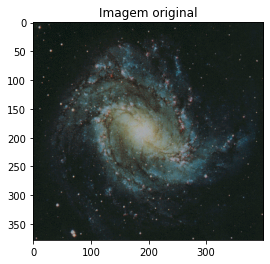

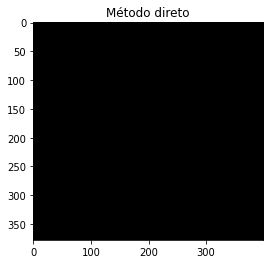

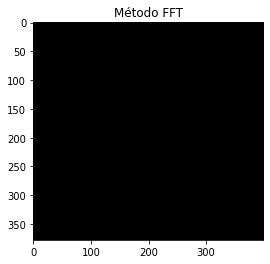

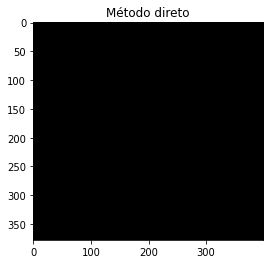

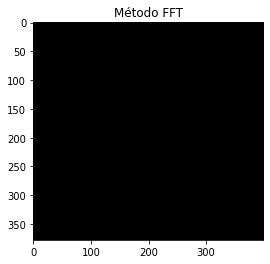

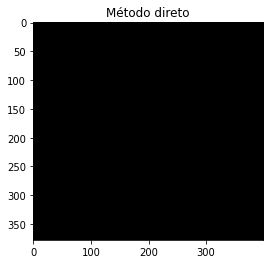

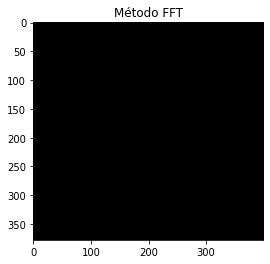

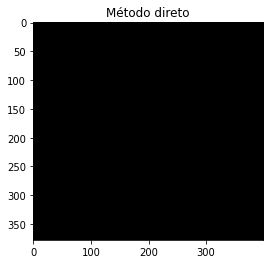

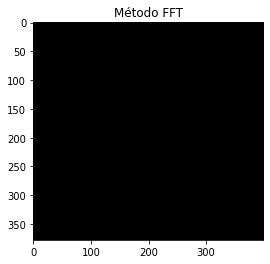

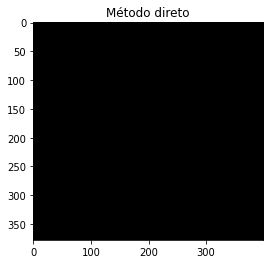

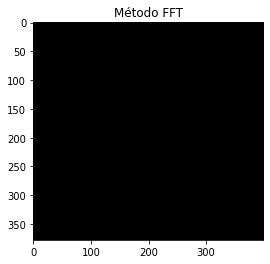

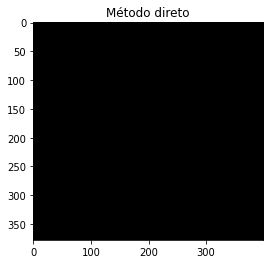

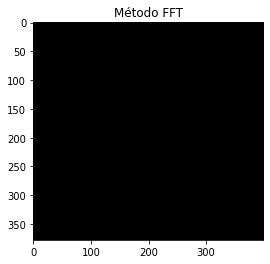

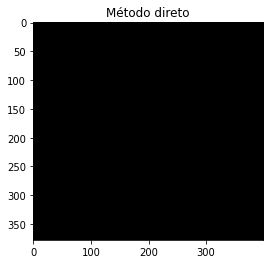

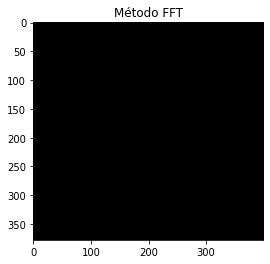

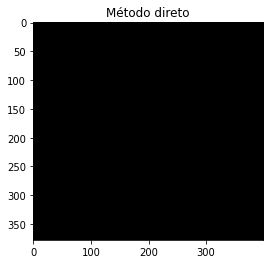

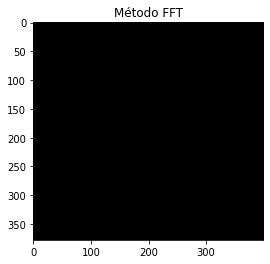

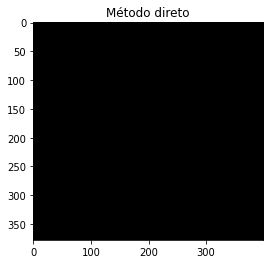

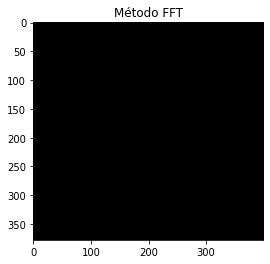

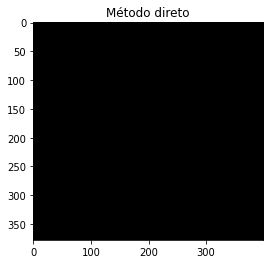

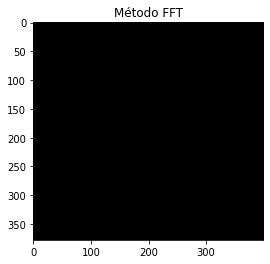

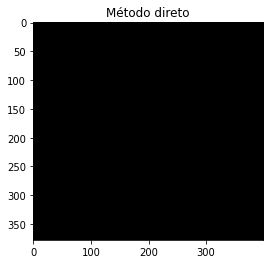

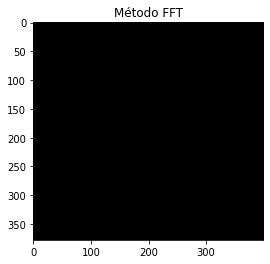

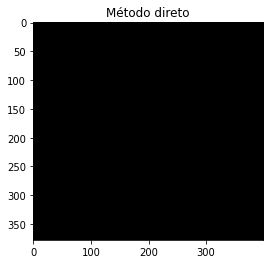

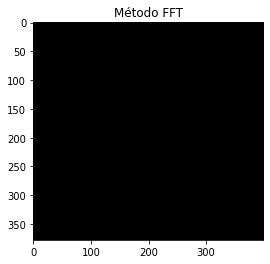

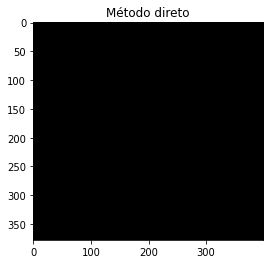

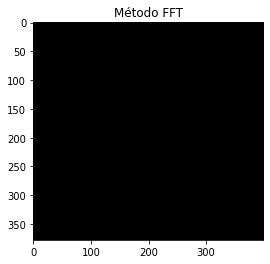

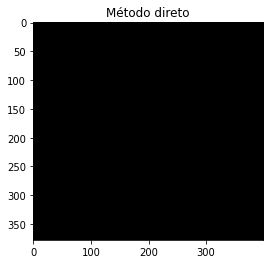

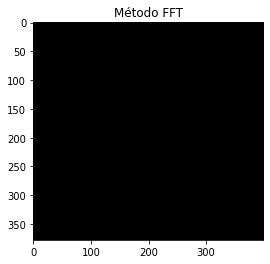

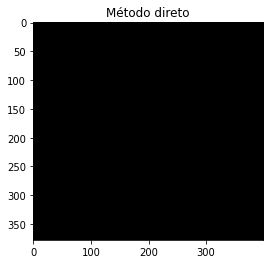

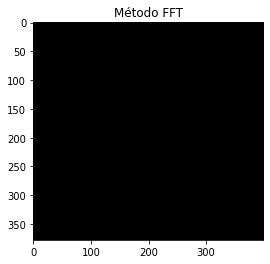

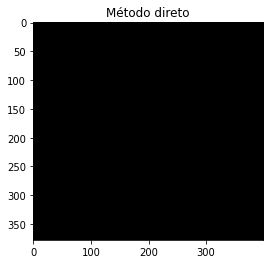

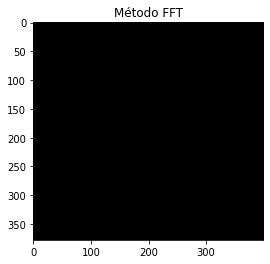

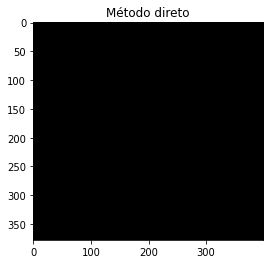

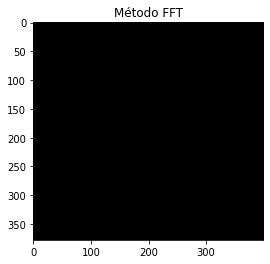

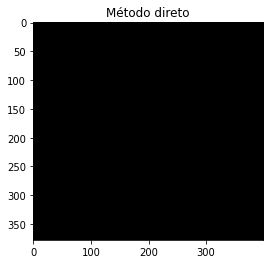

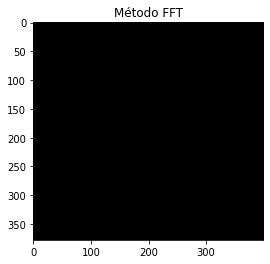

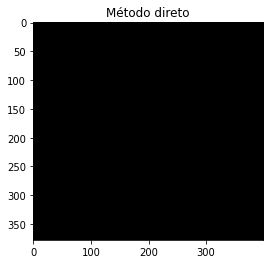

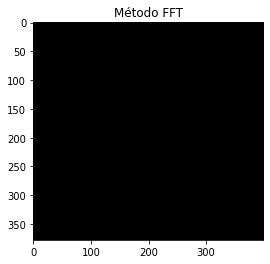

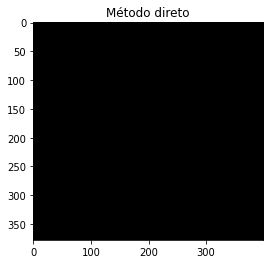

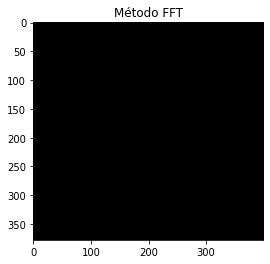

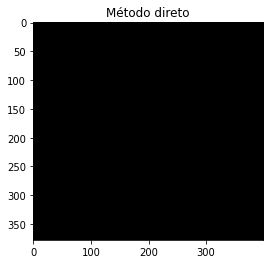

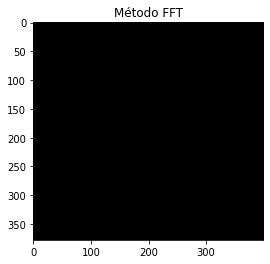

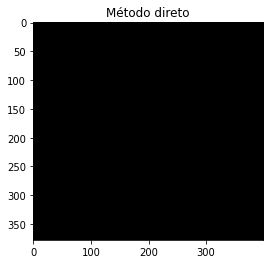

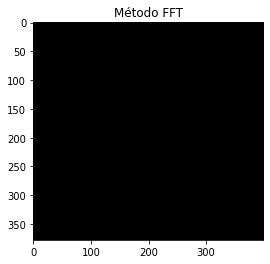

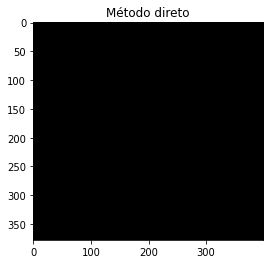

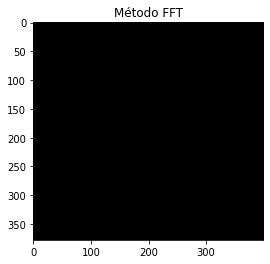

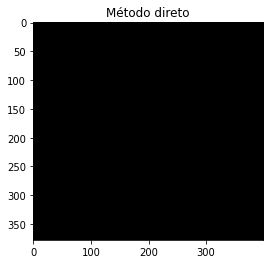

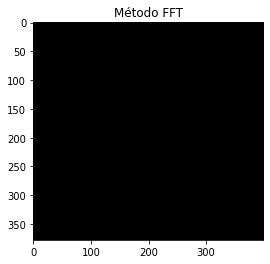

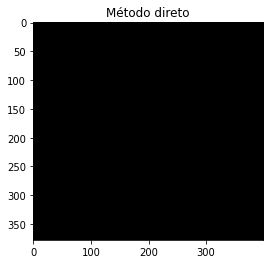

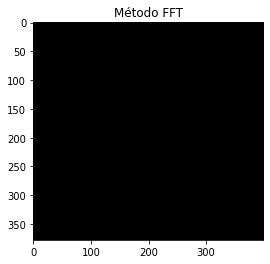

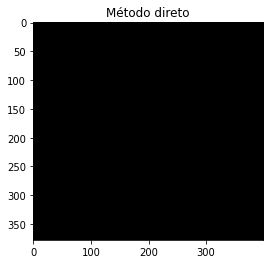

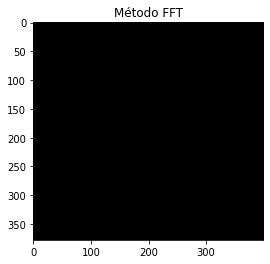

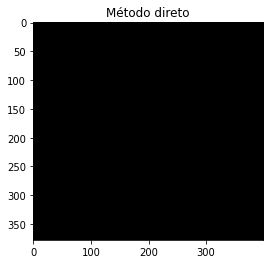

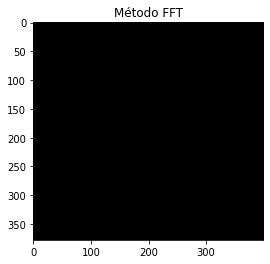

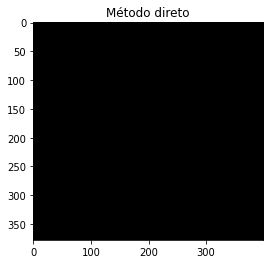

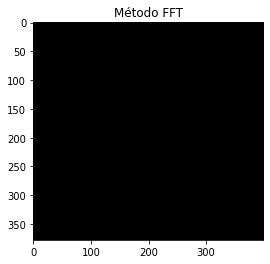

In [19]:
# imagem fixa e filtro variável
img = plt.imread('Fotos/m83.tif')
plt.figure()
plt.imshow(img, cmap='gray')
plt.title("Imagem original")
img = img[:,:,0]
print(img.shape)
for i in range(2, 30):
    filtro = random_matrix(i, i)
    imgDirect, imgFFT = testeTempoExecucao(img, filtro, 10)
    plt.figure()
    plt.imshow(imgDirect, cmap='gray')
    plt.title("Método direto")
    plt.figure()
    plt.imshow(imgFFT, cmap='gray')
    plt.title("Método FFT")

Tempo do método direto: 2.566085 Tamanho do sinal: (640, 480) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.332630 Tamanho do sinal: (640, 480) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.2334546000056434
Método FFT é mais rápido
Tempo do método direto: 1.231276 Tamanho do sinal: (378, 400) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.177298 Tamanho do sinal: (378, 400) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 1.0539783999993233
Método FFT é mais rápido
Tempo do método direto: 1.630499 Tamanho do sinal: (537, 358) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.224788 Tamanho do sinal: (537, 358) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 1.4057109999994282
Método FFT é mais rápido
Tempo do método direto: 2.662762 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.377205 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.2855569000093965
Método FFT é mais rápido
Tempo do método direto: 

C:\Users\iteix\AppData\Local\Temp\ipykernel_13496\3173265958.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Tempo do método direto: 2.759945 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.331997 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.427948700002162
Método FFT é mais rápido
Tempo do método direto: 2.432033 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.346905 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.0851281999930507
Método FFT é mais rápido
Tempo do método direto: 7.304149 Tamanho do sinal: (773, 1076) Tamanho do filtro: (5, 5)
Tempo do método FFT: 1.063359 Tamanho do sinal: (773, 1076) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 6.2407900000107475
Método FFT é mais rápido


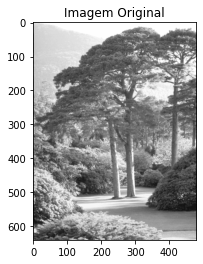

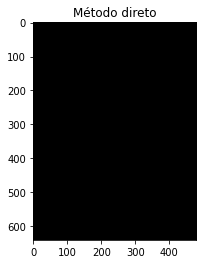

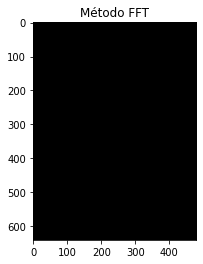

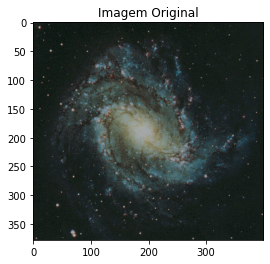

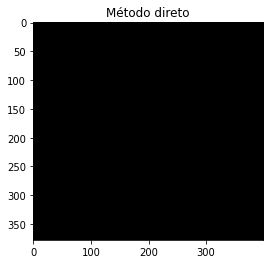

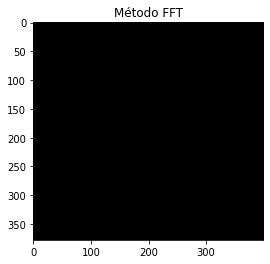

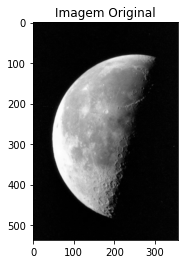

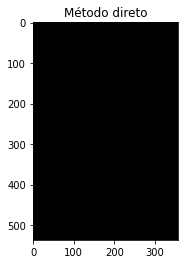

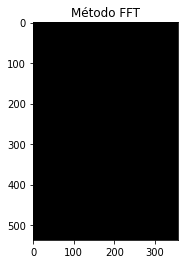

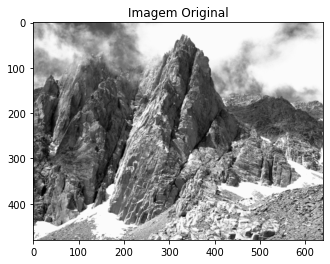

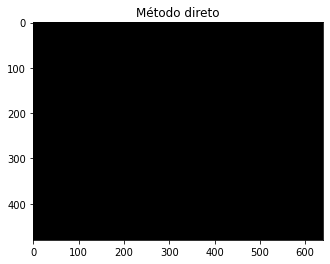

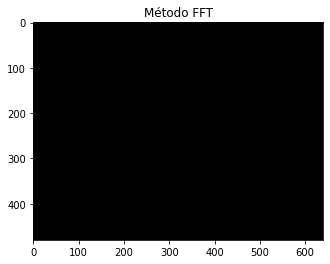

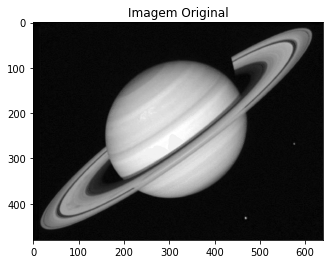

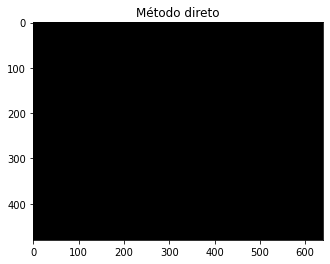

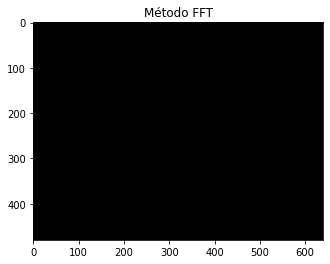

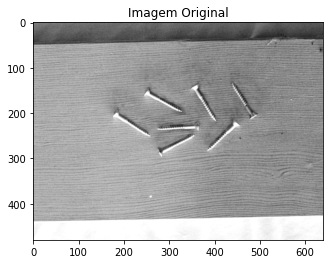

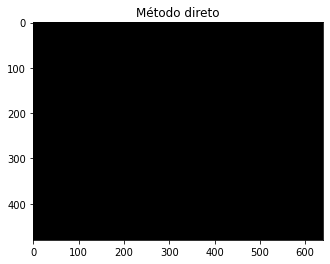

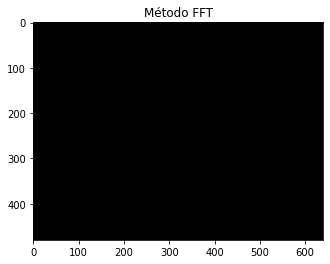

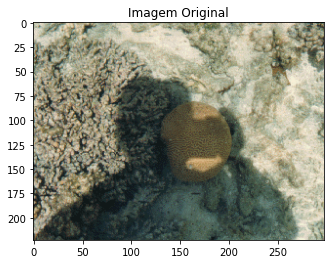

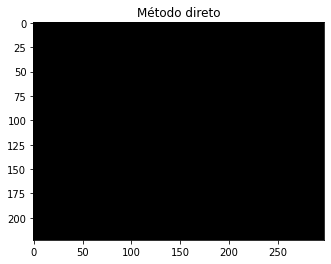

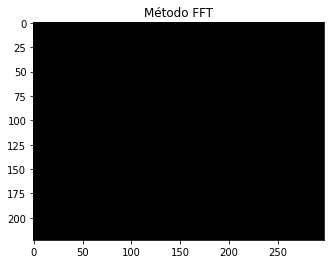

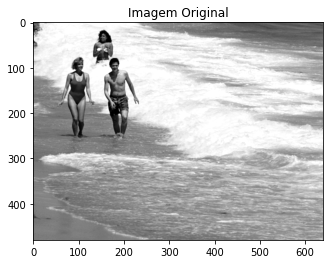

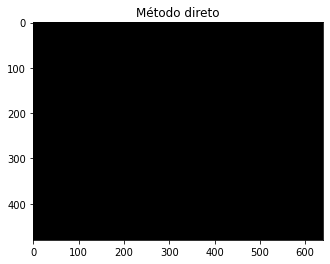

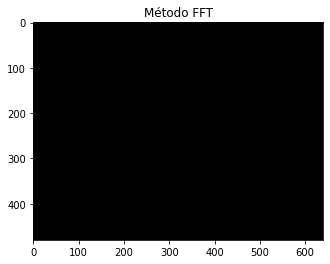

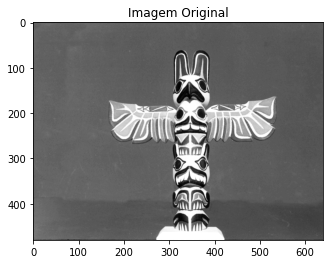

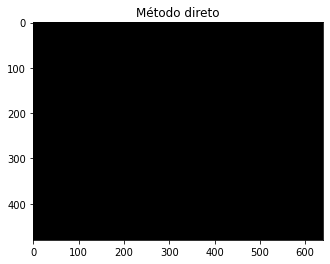

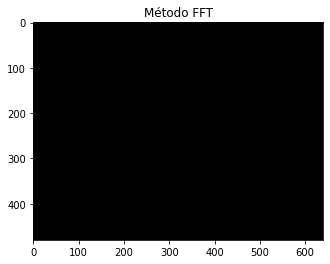

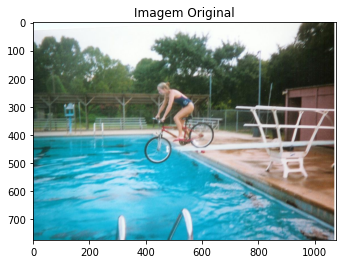

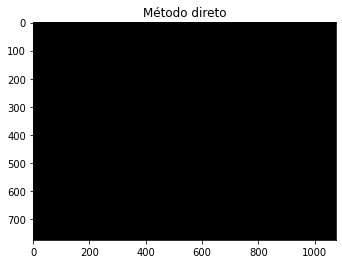

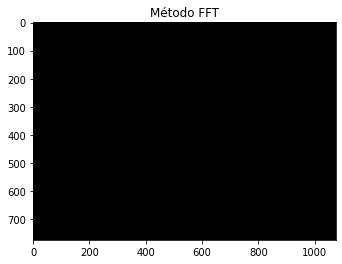

In [20]:
# imagem variável e filtro fixo
filtro = random_matrix(5,5)
for imageName in os.listdir('Fotos'):
    img = plt.imread('Fotos/' + imageName)
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title("Imagem Original")
    
    if img.ndim == 3:
        img = img[:,:,0]

    imgDirect, imgFFT = testeTempoExecucao(img, filtro, 10)
    plt.figure()
    plt.imshow(imgDirect, cmap='gray')
    plt.title("Método direto")
    plt.figure()
    plt.imshow(imgFFT, cmap='gray')
    plt.title("Método FFT")